# Siniestros Viales CABA

En este archivo se realizará un análisis exploratorio de los datos del archivo homicidios.csv, hoja HECHOS en búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados.

In [14]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

sys.path.append("..")
# importar librerías personalizadas de ./functions/EDA.py
from functions.EDA import get_frequency

## Cargar los Datos

In [15]:
# se importa el dataframe
hechos = pd.read_excel('../src/data/homicidios.xlsx', sheet_name='HECHOS')

## Exploración de los datos

### Vista rápida de los datos

Se realiza un breve vistazo de los datos.

In [16]:
# se verifica la estructura del dataframe hechos
hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [17]:
# se describe el df hechos
hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,Altura,COMUNA
count,696.000000,696,696.000000,696.000000,696.000000,129.000000,696.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,3336.635659,7.425287
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,30.000000,0.000000
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,1359.000000,4.000000
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,2551.000000,8.000000
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,4500.000000,11.000000
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,16080.000000,15.000000
std,0.179393,NaN,1.683754,3.571309,8.639646,3060.641793,4.387050


In [18]:
# se vilualizan las primeras filas de hechos
hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


### Comprensión de variables categóricas

In [6]:
# ver distrubución de TIPO_DE_CALLE
get_frequency(hechos, 'TIPO_DE_CALLE')

,TIPO_DE_CALLE,frequency,percentage
0,AVENIDA,429,61.64
1,CALLE,136,19.54
2,AUTOPISTA,66,9.48
3,GRAL PAZ,65,9.34


In [7]:
# ver distrubución de COMUNA
get_frequency(hechos, 'COMUNA')

,COMUNA,frequency,percentage
0,1,90,12.93
1,4,76,10.92
2,9,73,10.49
3,8,65,9.34
4,7,60,8.62
5,3,45,6.47
6,15,44,6.32
7,13,40,5.75
8,12,37,5.32
9,14,35,5.03


In [8]:
# ver distrubución de VICTIMA
get_frequency(hechos, 'VICTIMA')

,VICTIMA,frequency,percentage
0,MOTO,295,42.39
1,PEATON,264,37.93
2,AUTO,83,11.93
3,BICICLETA,29,4.17
4,SD,9,1.29
5,CARGAS,7,1.01
6,PASAJEROS,5,0.72
7,MOVIL,2,0.29
8,OBJETO FIJO,1,0.14
9,PEATON_MOTO,1,0.14


In [9]:
# ver distrubución de TIPO_DE_CALLE
get_frequency(hechos, 'TIPO_DE_CALLE')

,TIPO_DE_CALLE,frequency,percentage
0,AVENIDA,429,61.64
1,CALLE,136,19.54
2,AUTOPISTA,66,9.48
3,GRAL PAZ,65,9.34


In [10]:
# ver distrubución de ACUSADO
get_frequency(hechos, 'ACUSADO')

,ACUSADO,frequency,percentage
0,AUTO,204,29.31
1,PASAJEROS,173,24.86
2,CARGAS,146,20.98
3,OBJETO FIJO,62,8.91
4,MOTO,57,8.19
5,SD,23,3.30
6,MULTIPLE,17,2.44
7,BICICLETA,7,1.01
8,OTRO,6,0.86
9,TREN,1,0.14


In [11]:
# ver distrubución de PARTICIPANTES
get_frequency(hechos, 'PARTICIPANTES')

,PARTICIPANTES,frequency,percentage
0,PEATON-PASAJEROS,105,15.09
1,MOTO-AUTO,83,11.93
2,MOTO-CARGAS,78,11.21
3,PEATON-AUTO,77,11.06
4,MOTO-PASAJEROS,46,6.61
5,MOTO-OBJETO FIJO,40,5.75
6,PEATON-CARGAS,38,5.46
7,AUTO-AUTO,31,4.45
8,PEATON-MOTO,30,4.31
9,MOTO-MOTO,25,3.59


### Análisis descriptivo de las variables numéricas

In [12]:
# análisis descriptivo de AAAA, MM, DD y EDAD
hechos[['AAAA', 'MM', 'DD', 'HH', 'pos x', 'pos y']].describe()

,AAAA,MM,DD
count,696.000000,696.000000,696.000000
mean,2018.188218,6.692529,15.936782
std,1.683754,3.571309,8.639646
min,2016.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000
50%,2018.000000,7.000000,16.000000
75%,2020.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


### Conclusiones

- El dataframe "hechos" presenta valores SD (sin dato) en múltimples elementos.
- En el caso de las comunas, las dos comunas desconocidas tienen el valor 0.
- Existen filas con datos SD en casi todos sus elementos.
- La mayoría de los hechos ocurren en avenidas.
- La mayoría de las víctimas son Motos y Peatones.
- La mayoría de los acusados son Autos.

## Limpieza de datos

Los datos con valores DA se transforman en NaN  y se visualizan mejor.

In [13]:
# Reemplazar "SD" por NaN en todos los datos para mejor visualización
hechos.replace('SD-SD', np.nan, inplace=True)
hechos.replace("SD", np.nan, inplace=True)
hechos['XY (CABA)'].replace("Point (. .)", np.nan, inplace=True)
hechos['pos x'].replace(".", np.nan, inplace=True)
hechos['pos y'].replace(".", np.nan, inplace=True)

# contar nulos
hechos.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       1
HH                         1
LUGAR_DEL_HECHO            1
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                 14
pos x                     12
pos y                     12
PARTICIPANTES              5
VICTIMA                    9
ACUSADO                   23
dtype: int64

Se decidió quedarse con los datos:
- ID.
- N_VICTIMAS (aunque luego puede sacarse si coinciden con las cantidades de víctimas en el otro DataSet)
- FECHA (sustituye a AAAA, MM y DD evitando redundancias)
- pos x y pos y: sustituye A LUGAR_DEL_HECHO, Dirección Normalizada
- LUGAR_DEL_HECHO: mejor identificación de calles. Sustituye a Calle, Altura. 
- Cruce:  puede reemplazarse por booleano indicando si el accidente ocurrió en un cruce o no
- COMUNA: esta se verá si es necesaria, dado que las distribuciones son bastante similares se revisará si es influyente.
- HH: sustituye a la hora representando directamente una franja horaria.
- PARTICIPANTES, VICTIMA y ACUSADO.

In [20]:
# se eliminan columnas redundantes o innecesarias
hechos.drop(['AAAA', 'MM', 'DD', 'HORA', 'Calle', 'Altura', 'Dirección Normalizada', 'XY (CABA)'], inplace=True, axis=1)

In [21]:
# se convierten los datos de Cruce a booleano
hechos['Cruce'] = hechos['Cruce'].notnull()

In [22]:
#119,2016-0151,1,2016-11-18,20.0,CALLE,false,0,PEATON-SD,PEATON: es el único dato din LUGAR_DEL_HECHO y no aporta información
# se elimina el único valor nulo de LUGAR_DEL_HECHO
hechos.dropna(subset=['LUGAR_DEL_HECHO'], inplace=True)

# verificamos que no hayan más valores nulos
hechos.isna().sum()

ID                  0
N_VICTIMAS          0
FECHA               0
HH                  1
LUGAR_DEL_HECHO     0
TIPO_DE_CALLE       0
Cruce               0
COMUNA              0
pos x              11
pos y              11
PARTICIPANTES       5
VICTIMA             9
ACUSADO            22
dtype: int64

In [23]:
# se visualizan los accidentes en la comuna 0
hechos[hechos['COMUNA'] == 0]

,ID,N_VICTIMAS,FECHA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Cruce,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
139,2016-0174,1,2016-12-27,0.0,AUTOPISTA 25 DE MAYO,AUTOPISTA,False,0,NaN,NaN,NaN,NaN,NaN


In [24]:
# Comuna 0 no tiene datos en la mayoría de las otras columnas, por lo que se puede eliminar
hechos = hechos[hechos['COMUNA']!= 0]

In [25]:
# Visualizar primeros datos
hechos.head(3)

,ID,N_VICTIMAS,FECHA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Cruce,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,True,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,True,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,7.0,AV ENTRE RIOS 2034,AVENIDA,False,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


## Visualización de los Datos

### Siniestros por Franja Horaria

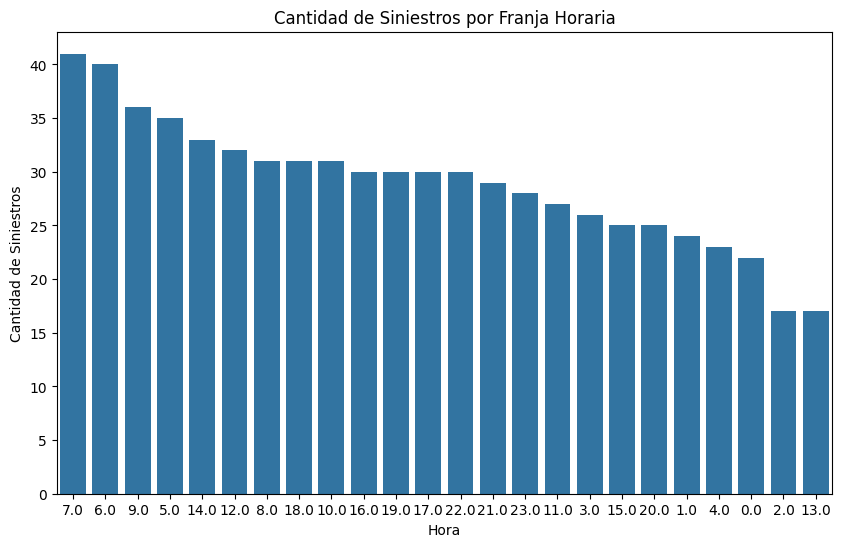

In [26]:
# Cantidad de víctimas por franja horaria
plt.figure(figsize=(10,6))
sns.countplot(x='HH', data=hechos, order=hechos['HH'].value_counts().index)
plt.title('Cantidad de Siniestros por Franja Horaria')
plt.xlabel('Hora')
plt.ylabel('Cantidad de Siniestros')
plt.show()

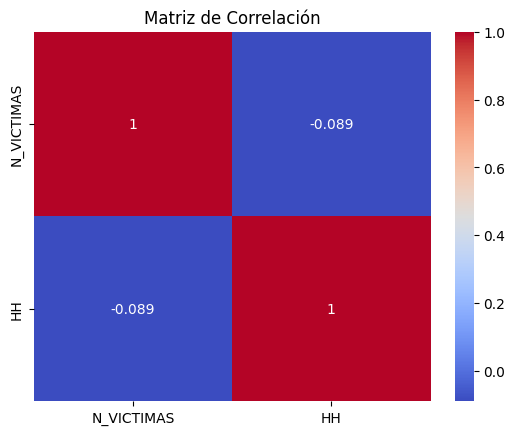

In [27]:
# Matriz de correlación de cantidad de víctimas por franja horaria
correlation_matrix = hechos[['N_VICTIMAS', 'HH']].corr()

#visualización
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

### Siniestros por tipo de calle

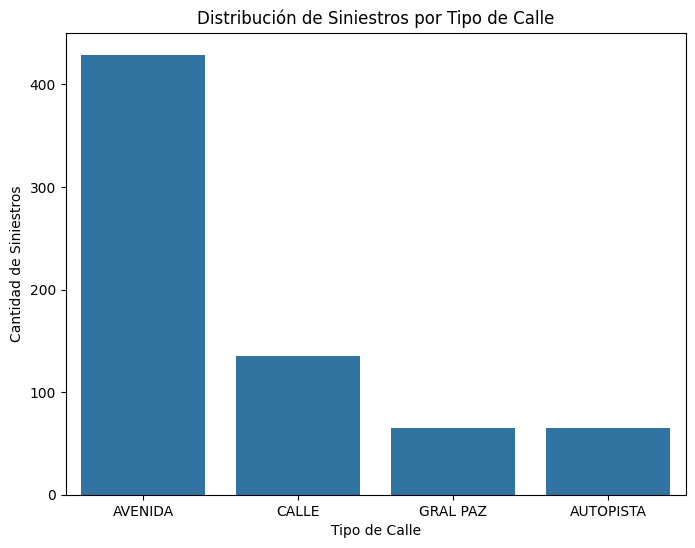

In [28]:
# Distribución de siniestros por tipo de calle
plt.figure(figsize=(8,6))
sns.countplot(x='TIPO_DE_CALLE', data=hechos, order=hechos['TIPO_DE_CALLE'].value_counts().index)
plt.title('Distribución de Siniestros por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Siniestros')
plt.show()

### Siniestros por Comuna

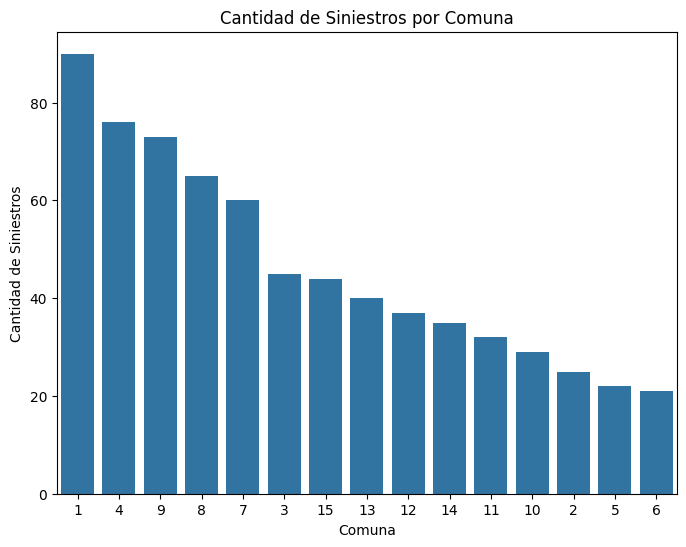

In [29]:
# Siniestros por comuna
plt.figure(figsize=(8,6))
sns.countplot(x='COMUNA', data=hechos, order=hechos['COMUNA'].value_counts().index)
plt.title('Cantidad de Siniestros por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Siniestros')
plt.show()

### Siniestros por tipo de víctima

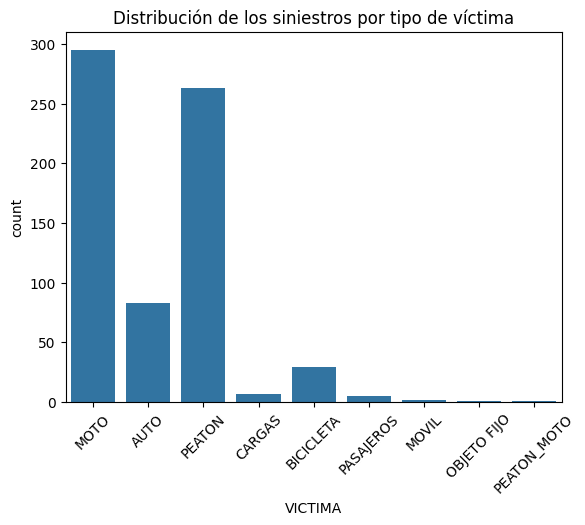

In [30]:
# Gráfico de barras para VICTIMA
sns.countplot(x='VICTIMA', data=hechos)
plt.title('Distribución de los siniestros por tipo de víctima')
plt.xticks(rotation=45)
plt.show()

### Distribución temporal de Siniestros

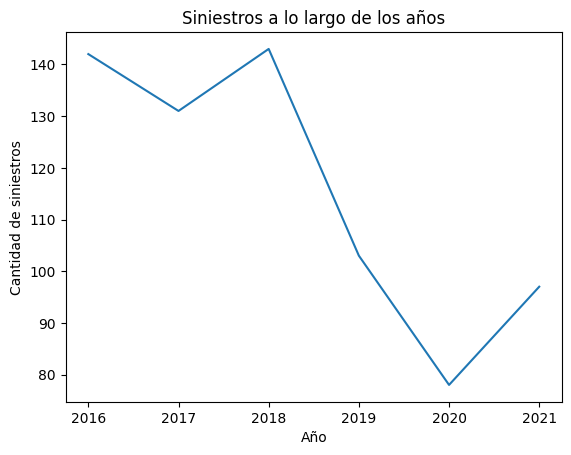

In [31]:
# Siniestros por año
siniestros_por_ano = hechos.groupby(hechos['FECHA'].dt.year).size()

# Gráfico de líneas
siniestros_por_ano.plot(kind='line')
plt.title('Siniestros a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad de siniestros')
plt.show()

In [32]:
# agrupar siniestros por franja horaria y contar el número de estos
siniestros_por_hora = hechos.groupby('HH')['N_VICTIMAS'].sum()

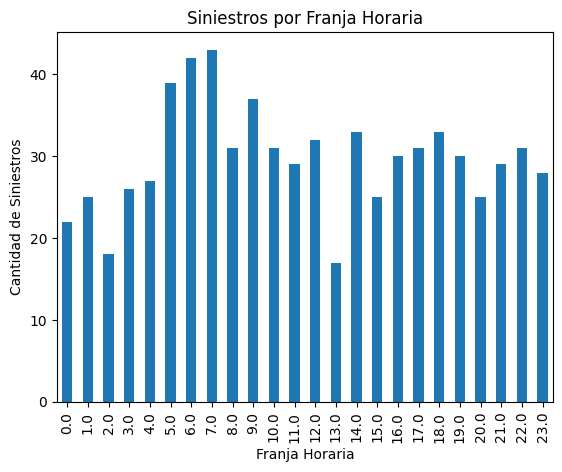

In [33]:
#gráfico de barras
siniestros_por_hora.plot(kind='bar')
plt.title('Siniestros por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Cantidad de Siniestros')
plt.show()

### Distribución Geográfica de los siniestros

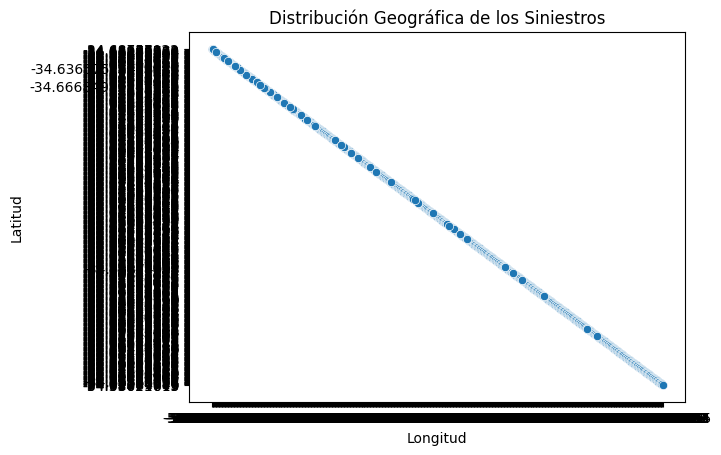

In [34]:
# mapa simple de scatterplot
sns.scatterplot(x='pos x', y='pos y', data=hechos)

plt.title('Distribución Geográfica de los Siniestros')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

### Cruce de variables relevantes

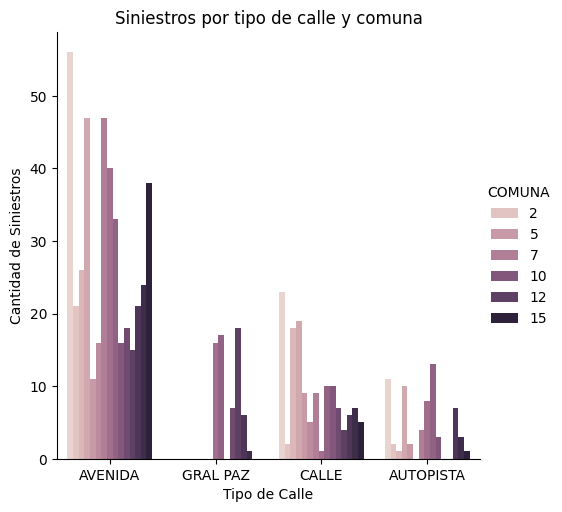

In [35]:
# gráfico combinado de tipo de calle y comuna
sns.catplot(x='TIPO_DE_CALLE', hue='COMUNA', kind='count', data=hechos)
plt.title('Siniestros por tipo de calle y comuna')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Siniestros')
plt.show()

### Análisis de víctimas y acusados

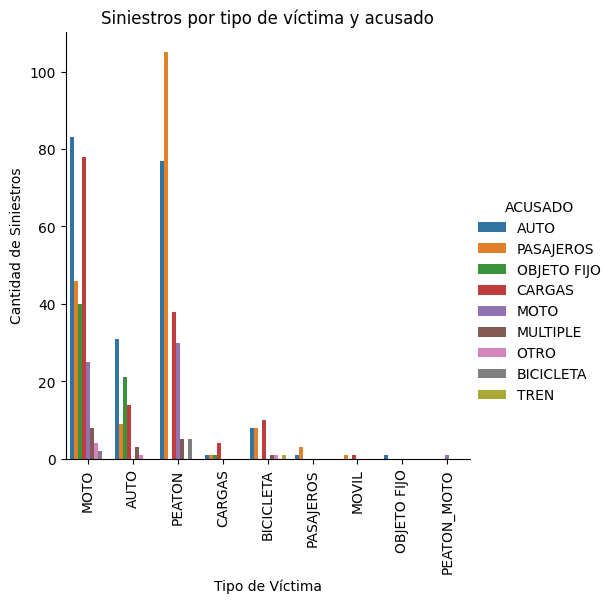

In [36]:
# gráfico cruzado entre víctima y acusado
sns.catplot(x='VICTIMA', hue='ACUSADO', kind='count', data=hechos)
plt.title('Siniestros por tipo de víctima y acusado')
plt.xlabel('Tipo de Víctima')
plt.ylabel('Cantidad de Siniestros')
plt.xticks(rotation=90)
plt.show()

## Conclusiones:

- La mayoría de los siniestros ocurren durante la franja horaria de 5 a 7:59 horas.
- La mayoría de los accidentes ocurren en avenidas.
- La mayoría de los accidentes la mayoría de accidentes ocurren en la comuna 1.
- La mayoría de las víctimas son motos y peatones.
- La mayoría de los accidentes ocurrieron entre los años 2016 y 2018.
- Se ve una mayor concentración de accidentes en áreas específicas.
- La mayor concentración de accidentes se encuentran en las avenidas de la comuna 2.
- La mayor cantidad de acusados son pasajeros siendo las víctimas los peatones.

### Exportar DataSet

In [38]:
# Exportar dataset final en ./src/data
hechos.to_csv('../src/data/hechos.csv', index=False)